# AI28 - Machine Learning 
GLANDIER Quentin \
CHEMANACK Thierry \
GI04

## <center>TP N° 1 - Partie 3</center>
## <center>Scipy</center>
<br>
<br>

### **1 - Interpolation**

In [1]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# 1. Créer un dataset (X, y)
X = np.linspace(0, 5, 10)
y = np.cos(X)

# 2. Utiliser la méthode interp1d pour faire l'interpolation du signal y
f = interp1d(X, y, kind='cubic')

#----------------------------------------------------------------

# Créer un ensemble de points pour la représentation graphique
X_new = np.linspace(0, 5, 100)

# Calculer les valeurs interpolées pour ces points
y_interp = f(X_new)

# Tracer le signal original et le signal interpolé
plt.figure(figsize=(8, 6))
plt.plot(X, y, 'o', label='Données originales')
plt.plot(X_new, y_interp, '-', label='Interpolation (cubique)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Interpolation de données avec scipy.interpolate')
plt.legend()
plt.grid(True)
plt.show()


### **2 - Optimisation**

Paramètres du modèle: [ 0.98032341 -2.84526195 -0.25917967  1.99139757]


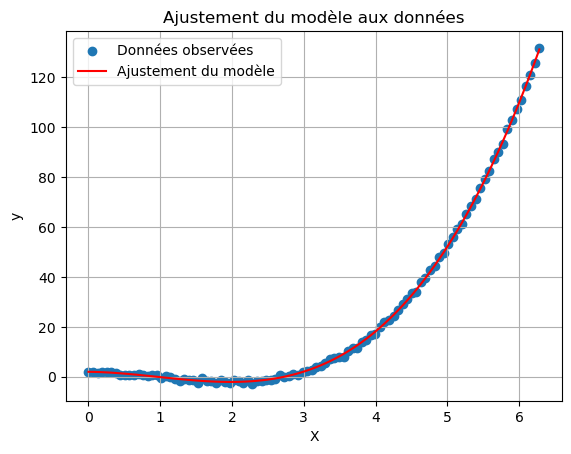

In [3]:
# 1. Importer les libraires Numpy, Matplotlib, Scipy.
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 2. Créer X est un tableau de taille 100 contenant des valeurs entre 0 et 2π.
X = np.linspace(0, 2*np.pi, 100)

# 3. Déclarer un variable y = X^3 − 3X^2 + 2 + ε avec ε une variable aléatoire normale centrée réduite de même taille que X.
y = X**3 - 3*X**2 + 2 + np.random.normal(0, 0.5, size=X.shape)

# 4. Tracer le nuage de points (X, y).
plt.scatter(X, y, label='Données observées')

# 5. Définir un modèle statistique censé d’ajuster le nuage de points ci-dessus.
def f(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

# 6. Utiliser la méthode curve_fit pour déterminer numériquement les valeurs a, b, c, d.
params, params_cov = curve_fit(f, X, y)
# help(optimize.curve)
print("Paramètres du modèle:", params)

# 7. Tracer sur le même graphique le nuage de points du dataset et l’ajustement du modèle aux données.
plt.plot(X, f(X, *params), color='red', label='Ajustement du modèle')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Ajustement du modèle aux données')
plt.legend()
plt.grid(True)
plt.show()

### **3 - Minimisation unidimensionnelle (1D)**

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Définir la fonction f(x)
f = lambda x : x**2 + 10*np.cos(x)

# 1. Tracer le graphique de la fonction f(x)
x = np.linspace(-10, 10, 1000)
plt.plot(x, f(x), lw=3,  zorder=-1)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graphique de f(x) = x^2 + 10*cos(x)')
plt.grid(True)

# 2. Déterminer un minimum x* de la fonction f
x0 = -10  # Point de départ pour l'algorithme de minimisation
result = minimize(f, x0)
x_star = result.x[0]  
print(f"Minimum trouvé pour f, x={x_star}, y={f(x_star)}")

# 3. Marquer le minimum x* et le point de départ x0 sur le graphique
plt.scatter(x_star, f(x_star), s=100, c='r', marker='o', label='Minimum x*')
plt.scatter(x0, f(x0), s=100,  c='g', marker='+', label='Point de départ x0')
plt.legend()
plt.show()


Minimum trouvé pour f, x=2.5957390788052623, y=-1.8089833418214658


### **4 - Minimisation bidimensionnelle (2D)**

In [28]:
f = lambda u,v : np.sin(u) + np.cos(u + v) * np.cos(u)

# 1. Construire une grille (U, V) à valeurs dans [-5, 5] × [-5, 5]
u = np.linspace(-5, 5, 100)
v = np.linspace(-5, 5, 100)
U, V = np.meshgrid(u, v)

# 2. Visualiser le contour de la fonction f
plt.contour(U, V, f(U, V), levels=20)
plt.xlabel('u')
plt.ylabel('v')
plt.title('Contours de la fonction f(u, v)')
plt.colorbar(label='f(u, v)')
plt.grid(True)

# 3. Déterminer un minimum x⋆ de la fonction f en utilisant minimize
# Définir un point de départ x0
x0 = np.array([0, 0])

# 4. Afficher les coordonnées du minimum obtenu
result = minimize(lambda x: f(*x), x0=x0).x # x[0]=u, x[1]=v
print('le minimum est aux coordonnées', result)

# 5. Afficher le point de départ et le point final sur le contour
plt.scatter(x0[0], x0[1], marker='+', c='r', s=100, label='initial') # Point de départ
plt.scatter(result[0], result[1], c='g', s=100, label='final') # Point final
plt.legend()
plt.show()


le minimum est aux coordonnées [-0.78539918 -2.3561934 ]


### **5 - Traitement de signal**

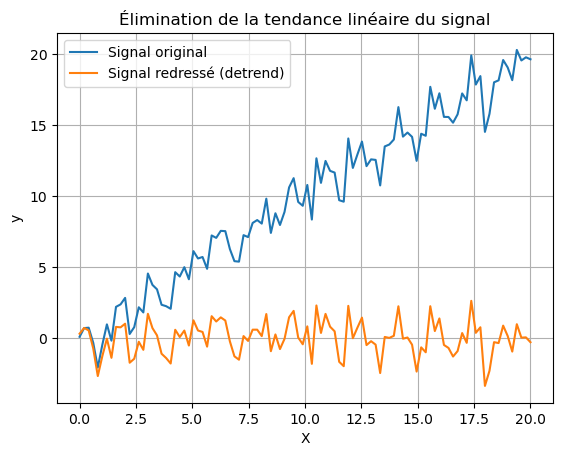

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# 1. Création d’un dataset avec une tendance linéaire
X = np.linspace(0, 20, 100)
y = X + np.cos(4*X) + np.random.randn(X.shape[0])

# Tracer le signal original
plt.plot(X, y, label='Signal original')

# 2. Éliminer la tendance linéaire avec signal.detrend
y_detrended = signal.detrend(y)

# Tracer le signal redressé (detrend)
plt.plot(X, y_detrended, label='Signal redressé (detrend)')

# Configurations du graphique
plt.xlabel('X')
plt.ylabel('y')
plt.title('Élimination de la tendance linéaire du signal')
plt.legend()
plt.grid(True)
plt.show()
